# K - Nearest Neighbor Classifier

## 1. Introduction

### Import Libraries

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd

%matplotlib inline

## 2. Analysis on Sample Data

Generate sample data

In [149]:
def generate_sample(x1_center, x2_center, max_radius, num_samples, ymax=999, ymin=-999):
    i = 0
    x1_list = []
    x2_list = []
    x1_min = x1_center - max_radius
    x1_max = x1_center + max_radius
    x2_min = x2_center - max_radius
    x2_max = x2_center + max_radius
    while i < num_samples:
        x1 = np.random.uniform(x1_min, x1_max)
        x2 = np.random.uniform(x2_min, x2_max)
        mag_data = np.power(x1 - x1_center, 2) + np.power(x2 - x2_center, 2)
        if (
            (mag_data <= np.power(max_radius, 2))
            & (x2 > ymin)
            & (x2 < ymax)
        ):
            x1_list.append(x1)
            x2_list.append(x2)
            i = i + 1
        else:
            continue

    return np.vstack((x1_list, x2_list)).T

In [181]:
x1_centers = [0,0,2]
x2_centers = [0,2,0]
num_data = 50

datas = []
for i in range(0,len(x1_centers)):
    datas.append(generate_sample(x1_centers[i],x2_centers[i],1.5,num_data))
    
X = np.vstack(datas)
y = list(np.hstack([[1] * num_data,[2] * num_data,[3] * num_data]))

(-2.0, 4.0)

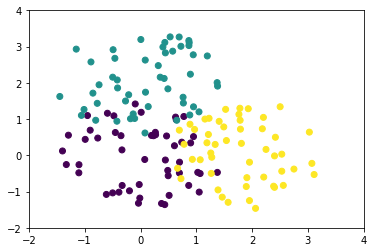

In [183]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim(-2,4);plt.ylim(-2,4)

Initialize kNN Classifier

In [190]:
neigh = NearestNeighbors(n_neighbors=15)
neigh.fit(X,y)

NearestNeighbors(n_neighbors=15)

In [195]:
X_sample = np.array(([0,1],[1,0]))

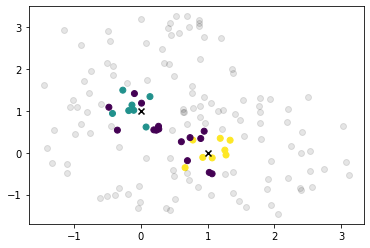

In [196]:
neighbors=neigh.kneighbors(X_sample)
id_arr = neighbors[1]
id_arr = id_arr.flatten().tolist()

arr =  X[id_arr]
y = np.array(y)
arr_y = y[id_arr]
arr_ex = np.array([element for i, element in enumerate(X) if i not in id_arr])

plt.scatter(arr[:,0],arr[:,1],c=arr_y)
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c='k')
plt.scatter(arr_ex[:,0],arr_ex[:,1],c='k',alpha=0.1)

As we see, there are data points that are closer to our sample points compared to other neighbors. Currently, those close data points will have the same vote weight as the one that is farther. We can modify this charactheristic by using euclidean distance as weight factor on majority vote to reflect that closer data points have closer resemblance.

In [179]:
np.array(arr_ex).shape

(270, 2)

numpy.ndarray

## 3. Usage on real data

In [227]:
df = pd.read_csv('Wholesale customers data.csv')

In [228]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Select features

In [237]:
X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].to_numpy()
y = df[['Channel']].to_numpy().ravel()

Split train-test

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Normalize feautures

In [255]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [256]:
X_train=scaler.transform(X_train)

Train model

In [257]:
time_now = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
print("Time to fit model {0} ms".format(1000*(time.time()-time_now)))

Time to fit model 0.9970664978027344 ms


In [264]:
time_now = time.time()
y_pred=neigh.predict(X_test)
print("Time to predict {0} ms".format(1000*(time.time()-time_now)))

Time to predict 5.497217178344727 ms


In [266]:
score = 100*(1-np.sum(np.abs(y_pred-y_test))/len(y_test))
print(score)

69.86301369863014


1618197273.4284892